In [136]:
# import json
# import pandas as pd


# catName = [
#     "women-clothing",
#     "men-clothing",
#     "cellphones-telecommunications",
#     "computer-office",
#     "consumer-electronics",
#     "jewelry-accessories",
#     "home-garden",
#     "luggage-bags",
#     "toys-hobbies",
#     "sports-entertainment",
#     "beauty-health",
#     "automobiles-motorcycles",
#     "tools",
# ]

# def main():
#   # jsFiles = []
#   # for id in catName:
#   #   file = open("raw_11_"+id+".json","r",encoding='utf8')
#   #   data = json.load(file)
#   #   jsFiles.extend(data)
  
#   # with open("Nov_11_raw.json","w") as file:
#   #   json.dump(jsFiles,file)
#   #   file.close()
#   clean()
  
    
    
# def clean():
#   # Open Data File
#   with open("Nov_11_raw.json") as file:
#     #Read it as json
#    data = json.load(file)
#    # open a file to write to it
#    with open("raw_csv.csv","w",encoding='utf-8') as csvFile:
#      csvFile.write("id,storeId,storeName,title,rating,lunchTime,category,postCategory,sold,price,discount,shippingCost,imageUrl,storeUrl\n")
     
#     # iterate over all products and write their infos
#      for obj in data:
#        shippingCost = None
#        #get the shipping cost of a product
#        # Ali express put the shipping cost in the selling points, each selling point has a tag id, mostly shipping cost is related to 885603359 tag id
#        # so we search the one that has the tag id and then get the shipping cost
#        # but the shipping cost is given in this format "+ shipping SAR  14.0 " so we split and then get the last and convert it from str to float
#        # free shipping is given like this ""
#        if("sellingPoints" in obj.keys() ):
#         for sellingPoint in obj["sellingPoints"]:
#            if(sellingPoint['sellingPointTagId'] == "885603359"):
#              if(sellingPoint['tagContent']['tagText'] != "Free Shipping"):
#                cost = sellingPoint['tagContent']['tagText'].split(" ")
#                shippingCost = float( cost[len(cost) -1].replace(",",""))
#              elif (sellingPoint['tagContent']['tagText'] != "Free Shipping"):
#                shippingCost = 0;
      
#        if( "store" in obj.keys() and "prices" in obj.keys() ):
#         csvFile.write("{0},{1},{2},{3},{4},{5},{6},{7},{8},{9},{10},{11},{12},{13}\n".format(  obj["productId"], obj["store"]["storeId"]  ,obj["store"]["storeName"].replace(","," "),obj ["title"]["displayTitle"].replace(","," "),   obj["evaluation"]["starRating"] if "evaluation" in obj.keys() else 0, obj["lunchTime"], obj["trace"]["exposure"]["displayCategoryId"],obj["trace"]["exposure"]["postCategoryId"],obj ["trade"]["tradeDesc"] if "trade" in obj.keys() and "tradeDesc" in obj['trade'].keys() else 0 , obj["prices"]["salePrice"]["minPrice"], obj["prices"]["salePrice"]["discount"] if "discount" in obj["prices"]["salePrice"].keys() else 0 ,shippingCost, obj["image"]["imgUrl"].replace(","," "),obj["store"]["storeUrl"].replace(","," ")))

   
     
    
# main()

In [137]:
import pandas as pd
df = pd.read_csv("raw_csv.csv")
#remove duplicate rows
df.drop_duplicates(subset=['id'],inplace=True)
print("from 160k to 40k rows, after removing duplicates (This depends on productId since it is unique to each row)\nit is not related to the actual item that is being sold we tested this")


from 160k to 40k rows, after removing duplicates (This depends on productId since it is unique to each row)
it is not related to the actual item that is being sold we tested this


In [138]:
# Since we have the discount as int now and it is suppose to be in floating number
# we will use apply on it
df['discount'] = df['discount'].apply( lambda x: x/100)

# the price show the discounted price after applying the discount
# we want to add the original price so
df['originalPrice'] = df['price'].apply(lambda x: x) / df['discount'].apply(lambda x: 1-x) 
# we Want to make the column title to make more sense so we add column called DiscountedPrice and drop the price column
df['discountedPrice'] = df['price'].apply(lambda x:x)
df.drop(columns=['price'],inplace=True)

# the sold column is of type object and has sold in it we should make it to int 

df['sold'] = df['sold'].apply(lambda x : int( x.split(" ")[0]) if x != None or x != "Nan" else 0 )

# Since category column is all NaN we will drop it
df.drop(columns=['category'],inplace=True)
# Then we want to drop any row that has a nan value
df.dropna(axis=0)
display(df)



,id,storeId,storeName,title,rating,lunchTime,postCategory,sold,discount,shippingCost,imageUrl,storeUrl,originalPrice,discountedPrice
0,1005003282269815,3654015,CHRLEISURE Stylish Store,Women Pants Warm Winter Thick Velvet Legging H...,4.8,2021-09-13 00:00:00,200000366,6639,0.60,None,//ae01.alicdn.com/kf/S437ebc0467d14d48b54492cb...,//www.aliexpress.com/store/3654015,63.300000,25.32
1,1005004853717054,911187004,Japanese Life Store,Kuzuwata High Waist Slim Contrast Color Plaid ...,4.5,2022-10-17 00:00:00,349,380,0.42,16.25,//ae01.alicdn.com/kf/Sd8c5cbd6a3f24362856300ef...,//www.aliexpress.com/store/911187004,221.948276,128.73
2,1005004900319130,1102281026,Goree Store,Fashion Female Jeans Leggings Woman High Waist...,0.0,2022-10-29 00:00:00,200000361,1,0.50,16.1,//ae01.alicdn.com/kf/Sf4929605f4bb46ed84d0c7e3...,//www.aliexpress.com/store/1102281026,150.540000,75.27
3,1005004520233097,1100367564,Shop1100367564 Store,Women classic Sweatshirt O-neck Casual Long Sl...,5.0,2022-07-12 00:00:00,200000348,122,0.21,21.11,//ae01.alicdn.com/kf/S4cf052cc7cec40138aa13bba...,//www.aliexpress.com/store/1100367564,138.962025,109.78
4,1005004316612186,4893007,Rosbinna ROSE BINA Store,Miyake Pleated Suit Women 2022 Summer Gradient...,4.8,2022-05-22 00:00:00,201531701,33,0.45,17.3,//ae01.alicdn.com/kf/S8ac063b048504f8596635f70...,//www.aliexpress.com/store/4893007,262.054545,144.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166353,33025693835,3872027,LOONPON Store,115mm Metal Cutting Disc Wheel Resin Cutting G...,5.0,2019-05-28 00:00:00,100006472,38,0.00,None,//ae01.alicdn.com/kf/Hc6c0917096dc44f79dfe8702...,//www.aliexpress.com/store/3872027,28.490000,28.49
166358,1005003555381316,109400,Winwin Repairs Tools Store,Qianli Multimeter Test Lead Replaceable Test W...,5.0,2021-11-14 00:00:00,100007505,13,0.00,None,//ae01.alicdn.com/kf/H3d7ed1f6e4224134a114b75d...,//www.aliexpress.com/store/109400,39.490000,39.49
166359,1005004872124518,912600053,SHUIHUA Official Store,490R 08T308 PM 4240 Colorful Nano Blue High Ha...,0.0,2022-10-21 00:00:00,100007219,1,0.00,None,//ae01.alicdn.com/kf/Sf102e5e43d7a492cbc45f3d2...,//www.aliexpress.com/store/912600053,40.810000,40.81
166360,1005003080837373,4042063,LEK Trading tools Store,CCMT09T304 UE6020 Carbide insert Internal Turn...,5.0,2021-07-31 00:00:00,100007219,11,0.00,None,//ae01.alicdn.com/kf/Hf2152803d22340c7bd2c4e5c...,//www.aliexpress.com/store/4042063,27.600000,27.60


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39382 entries, 0 to 166362
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   storeName        39382 non-null  object 
 1   title            39382 non-null  object 
 2   rating           39382 non-null  float64
 3   lunchTime        39382 non-null  object 
 4   postCategory     39382 non-null  int64  
 5   sold             39382 non-null  int64  
 6   discount         39382 non-null  float64
 7   shippingCost     39382 non-null  object 
 8   imageUrl         39382 non-null  object 
 9   storeUrl         39382 non-null  object 
 10  originalPrice    39382 non-null  float64
 11  discountedPrice  39382 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.9+ MB


None

,rating,postCategory,sold,discount,originalPrice,discountedPrice
count,39382.000000,3.938200e+04,39382.000000,39382.000000,39382.000000,39382.000000
mean,3.178147,9.895098e+07,155.455563,0.314482,130.039312,92.733381
std,2.267933,9.216292e+07,763.144455,0.205365,695.540970,627.097026
min,0.000000,3.290000e+02,0.000000,0.000000,0.030000,0.030000
25%,0.000000,1.524070e+05,2.000000,0.170000,14.078526,9.300000
50%,4.700000,1.000030e+08,13.000000,0.310000,37.117676,24.660000
75%,5.000000,2.000007e+08,64.750000,0.460000,96.125987,64.142500
max,5.000000,2.017085e+08,30352.000000,0.990000,61719.800000,61719.800000


We can See how Most products` rating are between 4-5 and alot are zeros 


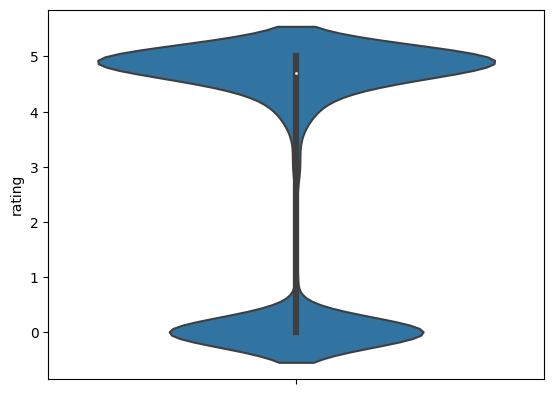

c:\Users\MEOW\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


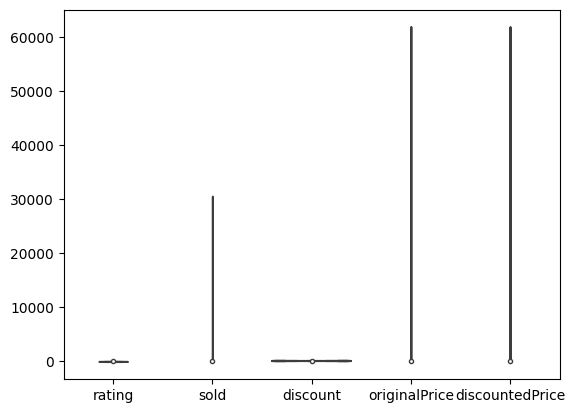

We can See how Most products` rating are between 4-5 and alot are zeros 


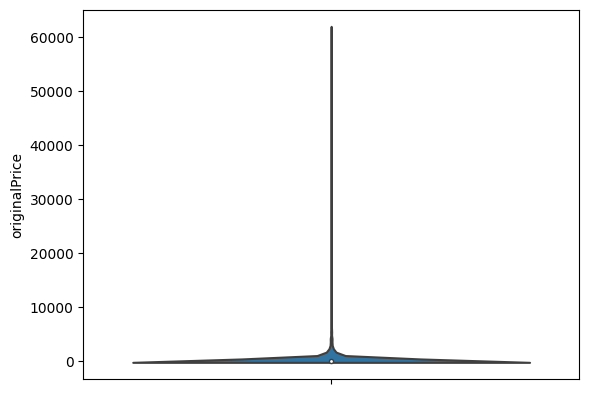

We can See how rating can affect the number of solds of a product 


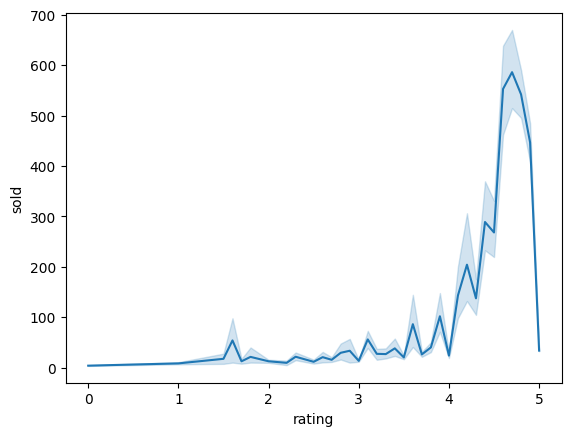

C:\Users\MEOW\AppData\Local\Temp\ipykernel_17724\633810667.py:27: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)


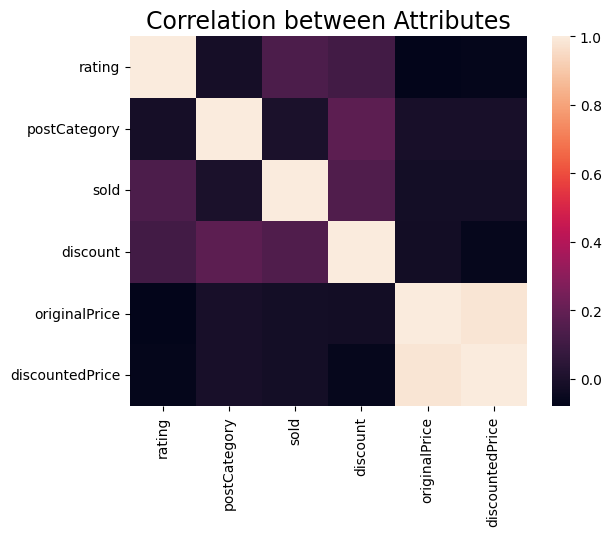

the most positive correlation pair is Effective pixels and Max resolution
 while the most negative one is zoom and weight


In [139]:
import seaborn as sp
import matplotlib.pyplot as plt
# Drop columns that are not statically relevant
# we can postCategory since category might reflect on how a product preforms
df = df.drop(columns=['id','storeId'])

display(df.info())
display(df.describe(exclude=['object']))

print("We can See how Most products` rating are between 4-5 and alot are zeros ")
sp.violinplot(data=df,y='rating')
plt.show()
plt.show()
print("We can See how Most products` rating are between 4-5 and alot are zeros ")
sp.violinplot(data=df,y='originalPrice')
plt.show()
# We can See how rating can affect the 
print("We can See how rating can affect the number of solds of a product ")
sp.lineplot(data=df,x='rating',y='sold')

plt.show()
# Answers to A-5
corr = df[df.select_dtypes(exclude="object").columns].corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(4)


plot = sp.heatmap(corr)
plot.axes.set_title("Correlation between Attributes",fontsize=17)
plt.show()
print("the most positive correlation pair is Effective pixels and Max resolution\n while the most negative one is zoom and weight")
